In [20]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
#          'width': 1024,
#          'height': 768,
          #'width': 3840,
#          #'height': 2160,    
#          #'width': 1200,
#          #'height': 600,    
})


{'width': 1024, 'height': 768}

<h2> <center> Tutorial on <br> The Particle in a box  </center> </h2>

<br>
<h3> <center> Reinhard J. Maurer </center> </h3>

<div class="col-md-12">
                    <h2> The particle in a box </h2>
                    <div class="col-md-12">
                    <div class="col-md-4">
                        <div class="col-md-10">
                            <img src="tik1d.png" alt="Motivation" width=600>
                        </div>
                    </div>
                    <div class="col-md-8">
                        <p>  Schrödinger equation (SE): $\quad\hat{H}\psi = E\psi $</p>
                        <p class="">  
                        SE: Hamilton ('energy') operator $\hat{H}$ defines the energy and wave function $\psi$  </p>
                        <p class=""> $$ \hat{H} = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2}  $$</p>
                        <p class=" margin-top-10"> boundary conditions: $ \psi(0) = 0 \quad\text{and}\quad \psi(L) = 0 $</p>
                    </div>
                    </div>
                    <div class="col-md-6">
                        <br>
                        <b> wave functions ('eigenfunctions')</b> 
                        <p> $$ \psi_n(x) = \sqrt{\frac{2}{L}}\sin{\frac{n\pi}{L}}  $$  </p>
                    </div>
                    <div class="col-md-6">
                        <br>
                        <b> energies ('eigenvalues') </b>
                        <p> $$ E_n = \frac{\hbar^2\pi^2}{2m}\frac{n^2}{L^2}  $$  </p>
                    </div>
</div>                    



In [2]:


import numpy as np
import warnings
#warnings.filterwarnings('ignore')
import qmp

from bokeh.layouts import gridplot, widgetbox, column
from bokeh.plotting import figure, output_file, show
from bokeh.models import LinearAxis, Range1d
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Slider
from bokeh.models import TapTool, CustomJS
from bokeh.models import Span
from bokeh.models import Label
from bokeh.models.glyphs import HBar

from bokeh.io import output_notebook, push_notebook, show
from bokeh.palettes import viridis, magma

from ipywidgets import interact

output_notebook()

N=50
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
lw = 2.0
colors = magma(N)
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

Loading BokehJS ...

Model Summary
System: Grid
Integrator: NoneType
Mode: wave

Solving...
SOLVED



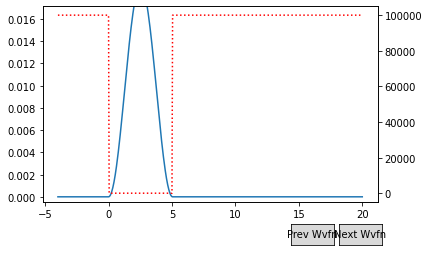

In [11]:
cell = np.array([[-4.0,20.0]])
m = 1.0
L=5
N=500

system = qmp.systems.Grid(m, cell, N)

# POTENTIAL
f = qmp.potential.presets.Box(1,
                              position=np.array([L/2.0]), 
                              width=np.array([L]),
                              height=np.array([100000.0]))
pot = qmp.potential.Potential(cell, f=f())

states = 30

wave_model = qmp.Model(
               potential=pot,
               system=system,
               mode='wave',
               states=states,
            )
print(wave_model)

wave_model.solve()

psi = wave_model.system.basis
x = wave_model.system.mesh[0]
E = wave_model.system.E
from qmp.tools.visualizations import wave_slideshow1D
wave_slideshow1D(x,psi,wave_model.potential(x))


In [5]:
cell = [[-4.0,11.0]]

def do_calcs1(m=1.0,L=5):
    f = qmp.potential.presets.Box(1,
                              position=np.array([L/2.0]), 
                              width=np.array([L]),
                              height=np.array([1000000.0]))
    x = np.linspace(-4,11,2000)
    E = np.zeros(50)
    psi = np.zeros([len(x),50])
    for i in range(50):
        E[i] = ((i+1)*(i+1)*np.pi*np.pi)/(2*m*L*L)
        psi[:,i] = np.sin(x*(i+1)*np.pi/L)*np.sqrt(2/L)
    for i, xx in enumerate(x):
        if xx<0. or xx>L:
            psi[i,:] = 0.0
    dens = psi*psi
    
    return x, E, pot, psi, dens

In [19]:
cell = np.array([[-4.0,11.0]])
N=1000
def do_calcs(m=1.0,L=5):

    f = qmp.potential.presets.Box(1,
                              position=np.array([L/2.0]), 
                              width=np.array([L]),
                              height=np.array([10.0]))
    pot = qmp.potential.Potential(cell, f=f())

    system = qmp.systems.Grid(m, cell, N)
    
    states = 50
    wave_model = qmp.Model(
               potential=pot,
               system=system,
               mode='wave',
               states=states,
            )


    wave_model.solve()

    psi = wave_model.system.basis
    x = wave_model.system.mesh[0]
    E = wave_model.system.E
    #for i in range(states):
    dx = x[1]-x[0]
    psi /= np.sqrt(dx)
    dens = np.abs(psi*np.conjugate(psi))
    
    
    return x, E, pot, psi, dens


In [34]:
cell = np.array([[-4.0,11.0]])
def do_calcs2(m=1.0,L=5):
    
    def f(x):
        x = np.array([x]).flatten()
        for i, xx in enumerate(x):
            if xx< 0.0 or xx> L:
                x[i] = 1000000.
            elif xx>=0.0 and xx<=0.4*L:
                x[i] = 0.0
            elif xx>=0.6*L and xx<=L:
                x[i] = 0.0
            else:
                x[i] = 1.0
        return x
        
    pot = qmp.potential.Potential(cell, f=f)

    system = qmp.systems.Grid(m, cell, N)
    
    states = 50
    wave_model = qmp.Model(
               potential=pot,
               system=system,
               mode='wave',
               states=states,
            )

    wave_model.solve()

    psi = wave_model.system.basis
    x = wave_model.system.mesh[0]
    E = wave_model.system.E
    #for i in range(states):
    dx = x[1]-x[0]
    psi /= np.sqrt(dx)
    dens = np.abs(psi*np.conjugate(psi))
    
    
    return x, E, pot, psi, dens


In [35]:
L = 5.0
x, E, pot, psi, dens = do_calcs1(L=L)

source1 = ColumnDataSource(data=dict(E=E, right=np.ones(len(E))*L,color=colors))
source2 = ColumnDataSource(data=dict(x=x, y=pot(x)))
source3 = ColumnDataSource(data=dict(x=x, y=-psi[:,0]))
source4 = ColumnDataSource(data=dict(x=x, y=dens[:,0]))

source_vbar = ColumnDataSource(
        data=dict(
            x=[0,L],
        )
    )

callback = CustomJS(code="""""")
tap = TapTool(callback=callback)
#hover = HoverTool(callback=callback)

TOOLS="pan,wheel_zoom,box_zoom,reset"

p1 = figure(x_axis_label='x (atomic units)',y_axis_label='Energy (atomic units)',
            plot_width=800, plot_height=350, tools=[tap,'pan','box_zoom','wheel_zoom','reset'])
p1.xaxis.axis_label_text_font_size = "16pt"
p1.yaxis.axis_label_text_font_size = "16pt"
p1.xaxis.major_label_text_font_size= "12pt"
p1.yaxis.major_label_text_font_size= "12pt"

line_pot = p1.line('x', 'y', source=source2, line_width=lw+1, line_color='grey' )

p1.x_range=Range1d(-3,10)
p1.y_range=Range1d(-0.3,10)

label1 = Label(x=-1, y=E[0], text='n={0:2d}'.format(1),text_color=colors[0],
              text_font_size='14pt')
p1.add_layout(label1)

energies = p1.hbar(right='right',y='E',height=0.05, left=0, source=source1, color='color')


p2  = figure(x_axis_label='x (atomic units)',y_axis_label='Wave function', plot_width=400, plot_height=200, 
             tools=TOOLS)
p2.xaxis.axis_label_text_font_size = "16pt"
p2.yaxis.axis_label_text_font_size = "16pt"
p2.xaxis.major_label_text_font_size= "12pt"
p2.yaxis.major_label_text_font_size= "12pt"

line_psi = p2.line('x','y', source=source3, line_width=lw, line_color='blue')

vbars1 = p2.vbar('x',top=100, source=source_vbar, width=0.05, bottom=-100, color='grey')

p2.x_range=Range1d(-3,10)
p2.y_range=Range1d(-0.7,0.7)

p3  = figure(x_axis_label='x (atomic units)',y_axis_label='Probability', plot_width=400, plot_height=200, 
             tools=TOOLS)
p3.xaxis.axis_label_text_font_size = "16pt"
p3.yaxis.axis_label_text_font_size = "16pt"
p3.xaxis.major_label_text_font_size= "12pt"
p3.yaxis.major_label_text_font_size= "12pt"

line_dens = p3.line('x','y', source=source4, line_width=lw, line_color='blue')
vbars2 = p3.vbar('x',top=100, source=source_vbar, width=0.05, bottom=-100, color='grey')
p3.x_range=Range1d(-3,10)
p3.y_range=Range1d(-0.1,0.5)
p_box1 = gridplot([[p1],[p2,p3]])

def update(n,m,L):
    x, E, pot, psi, dens = do_calcs1(m=m,L=L)
    line_pot.data_source.data['y'] = pot(x)
    energies.data_source.data['E'] = E
    energies.data_source.data['right'] = np.ones(len(E))*L
    #arrow1.line_color=colors[n-1]
    #arrow1.end.line_color=colors[n-1]
    label1.y=E[n-1]
    label1.text='n={0:2d}'.format(n)
    label1.text_color=colors[n-1]
    line_psi.data_source.data['y'] = psi[:,n-1]
    line_psi.glyph.line_color = colors[n-1]
    line_dens.data_source.data['y'] = dens[:,n-1]
    line_dens.glyph.line_color = colors[n-1]
    vbars1.data_source.data['x'] = [0,L]
    vbars2.data_source.data['x'] = [0,L]
    push_notebook(handle=h1)
    
    
state_dict = {}
for i in range(1,50):
    state_dict[str(i)] = i

**Particle in a box**

In [36]:
h1=show(p_box1, notebook_handle=True)
interact(update, n=state_dict, m=(0.1,1.9), L=(0.1,10.0))

<function __main__.update(n, m, L)>

**Particle in a box with finite walls**

In [37]:
L = 5.0
x, E, pot, psi, dens = do_calcs(L=L)

source1 = ColumnDataSource(data=dict(x=x, E=E, right=np.ones(len(E))*L, color=colors))
source2 = ColumnDataSource(data=dict(x=x, y=pot(x)))
source3 = ColumnDataSource(data=dict(x=x, y=-psi[:,0]))
source4 = ColumnDataSource(data=dict(x=x, y=dens[:,0]))

#source1 = ColumnDataSource(
#        data=dict(
#            x=x,
#            y=pot,
#       #     desc=,
#        )
#    )
#source2 = ColumnDataSource(
##        data=dict(
#            x=x,
#            y=E,
#       #     desc=,
#        )
#    )
#hover = HoverTool(
#        tooltips=[
#            ("index", "$index"),
#            ("(x,y)", "($x, $y)"),
#           #("desc", "@desc"),
#        ]
#    )

callback = CustomJS(code="")
tap = TapTool(callback=callback)
#hover = HoverTool(callback=callback)

TOOLS="pan,wheel_zoom,box_zoom,reset"

p11 = figure(x_axis_label='x (atomic units)',y_axis_label='Energy (atomic units)',
            plot_width=800, plot_height=350, tools=[tap,'pan','box_zoom','wheel_zoom','reset'])
p11.xaxis.axis_label_text_font_size = "16pt"
p11.yaxis.axis_label_text_font_size = "16pt"
p11.xaxis.major_label_text_font_size= "12pt"
p11.yaxis.major_label_text_font_size= "12pt"
#p.extra_y_ranges = {'pot': Range1d(start=-10, end=10000)}
#p.add_layout(LinearAxis(y_range_name='pot'), 'right')
#p.line(x, pib.pot(x), line_width=lw, line_color='grey', y_range_name='pot' )

line_pot1 = p11.line('x', 'y', source=source2, line_width=lw+1, line_color='grey' )

p11.x_range=Range1d(-3,10)
p11.y_range=Range1d(-0.3,12)
#p1.xaxis.axis_label = ''
#p1.yaxis.axis_label = ''

label11 = Label(x=-1, y=E[0], text='n={0:2d}'.format(1),text_color=colors[0],
              text_font_size='14pt')
p11.add_layout(label11)

energies1 = p11.hbar('E', right='right', source=source1, height=0.05, left=0, color='color')

p22  = figure(x_axis_label='x (atomic units)',y_axis_label='Wave function', plot_width=400, plot_height=200, 
              tools=TOOLS)
p22.xaxis.axis_label_text_font_size = "16pt"
p22.yaxis.axis_label_text_font_size = "16pt"
p22.xaxis.major_label_text_font_size= "12pt"
p22.yaxis.major_label_text_font_size= "12pt"
line_psi1 = p22.line('x','y', source=source3, line_width=lw, line_color='blue')
vbars11 = p22.vbar('x',top=100, source=source_vbar, width=0.05, bottom=-100, color='grey')

p22.x_range=Range1d(-3,10)
p22.y_range=Range1d(-0.7,0.7)

p33  = figure(x_axis_label='x (atomic units)',y_axis_label='Density', plot_width=400, plot_height=200, tools=TOOLS)
p33.xaxis.axis_label_text_font_size = "16pt"
p33.yaxis.axis_label_text_font_size = "16pt"
p33.xaxis.major_label_text_font_size= "12pt"
p33.yaxis.major_label_text_font_size= "12pt"
line_dens1 = p33.line('x','y', source=source4, line_width=lw, line_color='blue')
vbars22 = p33.vbar('x',top=100, source=source_vbar, width=0.05, bottom=-100, color='grey')

p_box2 = gridplot([[p11],[p22,p33]])

p33.x_range=Range1d(-3,10)
p33.y_range=Range1d(-0.1,0.5)

def update1(n,m,L):
    x, E, pot, psi, dens = do_calcs(m=m,L=L)
    line_pot1.data_source.data['y'] = pot(x)
    energies1.data_source.data['E'] = E
    energies1.data_source.data['right'] = np.ones(len(E))*L
    label11.y=E[n-1]
    label11.text='n={0:2d}'.format(n)
    label11.text_color=colors[n-1]
    line_psi1.data_source.data['y'] = psi[:,n-1]
    line_psi1.glyph.line_color = colors[n-1]
    line_dens1.data_source.data['y'] = dens[:,n-1]
    line_dens1.glyph.line_color = colors[n-1]
    vbars11.data_source.data['x'] = [0,L]
    vbars22.data_source.data['x'] = [0,L]
    push_notebook(handle=h2)

Solving...
SOLVED



In [38]:
h2=show(p_box2, notebook_handle=True)
interact(update1, n=state_dict, m=(0.1,1.9), L=(1.,9.))

Solving...
SOLVED



<function __main__.update1(n, m, L)>

**Particle in a box with bump in the middle**

In [39]:
L = 5.0
x, E, pot, psi, dens = do_calcs2(m=1, L=L)

source1 = ColumnDataSource(data=dict(x=x, E=E, right=np.ones(len(E))*L, color=colors))
source2 = ColumnDataSource(data=dict(x=x, y=pot(x)))
source3 = ColumnDataSource(data=dict(x=x, y=-psi[:,0]))
source4 = ColumnDataSource(data=dict(x=x, y=dens[:,0]))

callback = CustomJS(code="")
tap = TapTool(callback=callback)
#hover = HoverTool(callback=callback)

TOOLS="pan,wheel_zoom,box_zoom,reset"

p11 = figure(x_axis_label='x (atomic units)',y_axis_label='Energy (atomic units)',
            plot_width=800, plot_height=350, tools=[tap,'pan','box_zoom','wheel_zoom','reset'])
p11.xaxis.axis_label_text_font_size = "16pt"
p11.yaxis.axis_label_text_font_size = "16pt"
p11.xaxis.major_label_text_font_size= "12pt"
p11.yaxis.major_label_text_font_size= "12pt"
#p.extra_y_ranges = {'pot': Range1d(start=-10, end=10000)}
#p.add_layout(LinearAxis(y_range_name='pot'), 'right')
#p.line(x, pib.pot(x), line_width=lw, line_color='grey', y_range_name='pot' )

line_pot1 = p11.line('x', 'y', source=source2, line_width=lw+1, line_color='grey' )

p11.x_range=Range1d(-3,10)
p11.y_range=Range1d(-0.3,12)
#p1.xaxis.axis_label = ''
#p1.yaxis.axis_label = ''

label11 = Label(x=-1, y=E[0], text='n={0:2d}'.format(1),text_color=colors[0],
              text_font_size='14pt')
p11.add_layout(label11)

energies1 = p11.hbar('E', right='right', source=source1, height=0.05, left=0, color='color')

p22  = figure(x_axis_label='x (atomic units)',y_axis_label='Wave function', plot_width=400, plot_height=200, 
              tools=TOOLS)
p22.xaxis.axis_label_text_font_size = "16pt"
p22.yaxis.axis_label_text_font_size = "16pt"
p22.xaxis.major_label_text_font_size= "12pt"
p22.yaxis.major_label_text_font_size= "12pt"
line_psi1 = p22.line('x','y', source=source3, line_width=lw, line_color='blue')
vbars11 = p22.vbar('x',top=100, source=source_vbar, width=0.05, bottom=-100, color='grey')

p22.x_range=Range1d(-3,10)
p22.y_range=Range1d(-0.7,0.7)

p33  = figure(x_axis_label='x (atomic units)',y_axis_label='Density', plot_width=400, plot_height=200, tools=TOOLS)
p33.xaxis.axis_label_text_font_size = "16pt"
p33.yaxis.axis_label_text_font_size = "16pt"
p33.xaxis.major_label_text_font_size= "12pt"
p33.yaxis.major_label_text_font_size= "12pt"
line_dens1 = p33.line('x','y', source=source4, line_width=lw, line_color='blue')
vbars22 = p33.vbar('x',top=100, source=source_vbar, width=0.05, bottom=-100, color='grey')

p_box3 = gridplot([[p11],[p22,p33]])

p33.x_range=Range1d(-3,10)
p33.y_range=Range1d(-0.1,0.5)

def update2(n,m,L):
    x, E, pot, psi, dens = do_calcs2(m=m,L=L)
    line_pot1.data_source.data['y'] = pot(x)
    energies1.data_source.data['E'] = E
    energies1.data_source.data['right'] = np.ones(len(E))*L
    label11.y=E[n-1]
    label11.text='n={0:2d}'.format(n)
    label11.text_color=colors[n-1]
    line_psi1.data_source.data['y'] = psi[:,n-1]
    line_psi1.glyph.line_color = colors[n-1]
    line_dens1.data_source.data['y'] = dens[:,n-1]
    line_dens1.glyph.line_color = colors[n-1]
    vbars11.data_source.data['x'] = [0,L]
    vbars22.data_source.data['x'] = [0,L]
    push_notebook(handle=h3)

Solving...
SOLVED



In [41]:
h3=show(p_box3, notebook_handle=True)
interact(update2, n=state_dict, m=(0.1,1.9), L=(1.,9.))

Solving...
SOLVED



<function __main__.update2(n, m, L)>

<div class="col-md-12">
     <h3> Problem 1 </h3>  
    <p  style="color:blue;"> <u>a</u>: Let's assume that the electron is in state n=2. What is the required energy to bring it into state n=3? </p>
    <div class="fragment"> 
    <p> $\Delta E=E(n=3)-E(n=2)= \frac{\hbar^2\pi^2}{2mL^2}(9-4)=5\cdot E_1 $
    </p>
    </div>
    <p  style="color:blue;"> <u>b</u>: Calculate the energy difference E(n=3)-E(n=2) for a box (molecule) of size L/2?</p>
     <div class="fragment">
    <p> $$ \Delta E=5\cdot \frac{\hbar^2\pi^2}{2m(L/2)^2}=5\cdot4\cdot \frac{\hbar^2\pi^2}{2mL^2} = 20\cdot E_1 $$ </p>
    <p> Smaller CdSe nanoparticles emit light with higher energy (blue) </p>
    </div>
</div>

<div class="col-md-12">
     <h3> Problem 2 </h3>
    <p  style="color:blue;"> <u>a</u>: What happens to the energy spectrum and the wave functions when the box width L becomes very large? What happens to the energy of the n=1 state? </p>
    <div class="fragment"> 
    <p> All energy spacings become very close to zero. The $E_1$ energy also approaches zero. 
    $L\rightarrow\infty$  approaches the limit of a free particle, where states are not quantized and there is no zero-point energy. </p> <br>
    <b> !Quantized energy levels with spacings are a consequence of confinement!
    </b>     
</div>




<h3> Problem 3 </h3>
  
<p   style="color:blue;"> <u>a</u>: In a realistic system, the potential wall will not be infinitely high and electrons will be able to escape eventually. What will be the consequence for the wave functions inside the well?  </p>
<div class="fragment"> 
<p> The wave functions do not strictly have to be 0 at the boundaries any more, but rather exponentially decay to zero. This means that the electrons can 'tunnel' into the barrier region.
</p>
</div>    
<p   style="color:blue;"> <u>b</u>:In a finite well, only a finite number of states has energies that lie below the well edge. What do wave functions describe that lie above this well edge? </p>
<div class="fragment"> 
<p> These wave functions will describe electrons with higher probability to be found outside the well, so-called 'unbound states' with properties similar to free electrons.
</p>
</div>       